# Stress Transformation and Mohr's Circle in 2D

<img src='stress_transformation.JPG' />

Reference:
https://civilengineering-softstudies.com/2020/09/python-code-for-mohrs-circle-stresse-at-a-given-angle-theta-principal-stresses-and-their-planes-maximum-shear-stress-and-its-plane.html
    


       Radius, R = √(0.25*(σx-σy)^2 + τxy^2) 
               = √(0.25*(80-40.0)^2 + -30.0^2)  =36.06 Mpa

       Average Stress,(acts at the Center of Mohr's Circle) 
               = σavg = (σx + σy)/2 = (80 + 40.0)/2 = 60.00 Mpa

       Principal Stresses
       σ1 = σavg + R = 60.00 + 36.06 = 96.06 Mpa
       σ2 = σavg - R = 60.00 - 36.06 = 23.94 Mpa
       Angle φ1 it makes with x-axis, 
       φ1 = 0.5(atan(2*τxy/(σx - σy)) = 0.5 * atan(2*-30.0/(80 - 40.0)) = -28.15 degrees
       Angle σ2 makes with x-axis = φ2 = φ1 + 90 = 61.85 degrees

       Maximum Shear Stress = τmax = R = 36.06 Mpa
       It occurs at, α = φ1 + 45 = 16.85 degrees

       Stresses at a plane with axis at θ anticlockwise from x axis, 
        σθ1 = σavg + R* Cos(2φ1 + 2θ) = 60.00 + 36.06* Cos(-54.22)
           = 75.98, Mpa
        σθ2 = σavg + R* Cos(2φ1 + 2θ + pi) = 
            44.02 Mpa
        τθ = R*Sin(2*φ1 + 2*θ)  = 32.320508075688764 Mpa

       


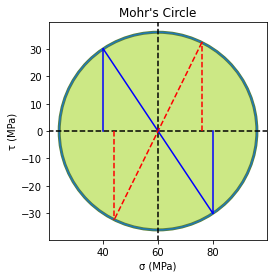

In [17]:
def mohcircle(σx,σy,τxy,u,w):
    import numpy as np
    import matplotlib.pyplot as plt
    import math
    
    θ = math.radians(w)
    R = np.sqrt(0.25 * (σx - σy) ** 2 + (τxy) ** 2)
    σavg = (σx + σy) / 2
    ψ = np.linspace(0, 2 * np.pi, 360)
    x = σavg + R * np.cos(ψ)
    y = R * (np.sin(ψ))
    φ1 = math.degrees(0.5 * math.atan(2. * τxy / (σx - σy)))
    φ2 = φ1 + 90
    σθ1 = σavg + R * np.cos(2 * np.radians(φ1) + 2 * θ)
    σθ2 = σavg + R * np.cos(2 * np.radians(φ1) + 2 * θ + np.pi)
    τθ = R * np.sin(2 * np.radians(φ1) + 2 * θ)
    print(f'''
       Radius, R = √(0.25*(σx-σy)^2 + τxy^2) 
               = √(0.25*({σx}-{σy})^2 + {τxy}^2)  ={R:.2f} {u}

       Average Stress,(acts at the Center of Mohr's Circle) 
               = σavg = (σx + σy)/2 = ({σx} + {σy})/2 = {σavg:.2f} {u}

       Principal Stresses
       σ1 = σavg + R = {σavg:.2f} + {R:.2f} = {σavg + R:.2f} {u}
       σ2 = σavg - R = {σavg:.2f} - {R:.2f} = {σavg - R:.2f} {u}
       Angle φ1 it makes with x-axis, 
       φ1 = 0.5(atan(2*τxy/(σx - σy)) = 0.5 * atan(2*{τxy}/({σx} - {σy})) = {φ1:.2f} degrees
       Angle σ2 makes with x-axis = φ2 = φ1 + 90 = {φ2:.2f} degrees

       Maximum Shear Stress = τmax = R = {R:.2f} {u}
       It occurs at, α = φ1 + 45 = {φ1 + 45:.2f} degrees

       Stresses at a plane with axis at θ anticlockwise from x axis, 
        σθ1 = σavg + R* Cos(2φ1 + 2θ) = {σavg:.2f} + {R:.2f}* Cos({2 * φ1 + 2 * θ:.2f})
           = {σθ1:.2f}, {u}
        σθ2 = σavg + R* Cos(2φ1 + 2θ + pi) = 
            {σθ2:.2f} {u}
        τθ = R*Sin(2*φ1 + 2*θ)  = {R * np.sin(2 * np.radians(φ1) + 2 * θ)} {u}

       ''')
    center = [σavg, 0.0]
    circ = plt.Circle((center[0],0), R, facecolor='#cce885', lw=3,edgecolor='#5c8037') 
    plt.axis('image')
    ax = plt.gca() 
    ax.add_artist(circ)   
    ax.set_xlim(σavg - R - .1*R, σavg + R + .1*R)
    ax.set_ylim(-1.1*R, 1.1*R)
    plt.plot(x, y)
    plt.plot([σavg - R - 10, σavg + R + 10], [0, 0], linestyle='--', color='black')
    plt.plot([σavg, σavg], [-R - 10, R + 10], linestyle='--', color='black')
    plt.plot([σx, σy], [τxy, -τxy], [σx, σx], [0, τxy], [σy, σy], [0, -τxy], linestyle='-', color='blue')
    plt.plot([σθ1, σθ2], [τθ, -τθ], [σθ1, σθ1], [0, τθ], [σθ2, σθ2], [0, -τθ], linestyle='--', color='red')
    plt.xlabel('σ (MPa)')
    plt.ylabel('τ (MPa)')
    plt.title("Mohr's Circle")
    plt.show()
    
if __name__ == "__main__":
    
    σx = 80
    σy = 40.
    τxy = -30.
    unit = 'Mpa'
    angle = 60 # Angle( in degrees) of plane's axis from x axis(+ve counter clockwise), θ 

    mohcircle(σx,σy,τxy,unit,angle)


# Stress State Analysis 3D

Reference: https://csmbrannon.net/2011/04/25/stress-state-analysis-python-script/comment-page-1/

In [24]:
import sys
import numpy
import math


def headerprint(string):
    """ Prints a centered string to divide output sections. """
    mywidth = 64
    mychar = "="
    numspaces = mywidth - len(string)
    before = int(math.ceil(float(mywidth-len(string))/2))
    after  = int(math.floor(float(mywidth-len(string))/2))
    print("\n"+before*mychar+string+after*mychar+"\n")

def valprint(string, value):
    """ Ensure uniform formatting of scalar value outputs. """
    print("{0:>30}: {1: .10e}".format(string, value))

def matprint(string, value):
    """ Ensure uniform formatting of matrix value outputs. """
    print("{0}:".format(string))
    print(value)


#
# The main section of the script
#
if __name__ == '__main__':
    

    sigma = np.array([
        [150,100,95],
        [0,96,0],
        [95,0,-50]])  

    sigma_iso = 1.0/3.0*numpy.trace(sigma)*numpy.eye(3)
    sigma_dev = sigma - sigma_iso

    # compute principal stresses
    eigvals = list(numpy.linalg.eigvalsh(sigma))
    eigvals.sort()
    eigvals.reverse()

    # compute max shear stress
    maxshear = (max(eigvals)-min(eigvals))/2.0

    # compute the stress invariants
    I1 = numpy.trace(sigma)
    J2 = 1.0/2.0*numpy.trace(numpy.dot(sigma_dev,sigma_dev))
    J3 = 1.0/3.0*numpy.trace(\
         numpy.dot(sigma_dev,numpy.dot(sigma_dev,sigma_dev)))

    # compute other common stress measures
    mean_stress = 1.0/3.0*I1
    eqv_stress  = math.sqrt(3.0*J2)

    # compute lode coordinates
    lode_r = math.sqrt(2.0*J2)
    lode_z = I1/math.sqrt(3.0)
    
    
    dum = 3.0*math.sqrt(6.0)*numpy.linalg.det(sigma_dev/lode_r)
    lode_theta = 1.0/3.0*math.asin(dum)

    # compute the stress triaxiality
    triaxiality = mean_stress/eqv_stress

    # Print out what we've found
    headerprint(" Stress State Analysis ")
    matprint("Input Stress",sigma)
    headerprint(" Component Matricies ")
    matprint("Isotropic Stress",sigma_iso)
    matprint("Deviatoric Stress",sigma_dev)
    headerprint(" Scalar Values ")
    valprint("P1",eigvals[0])
    valprint("P2",eigvals[1])
    valprint("P3",eigvals[2])
    valprint("Max Shear", maxshear)
    valprint("Mean Stress",mean_stress)
    valprint("Equivalent Stress", eqv_stress)
    valprint("I1",I1)
    valprint("J2",J2)
    valprint("J3",J3)
    valprint("Lode z",lode_z)
    valprint("Lode r",lode_r)
    valprint("Lode theta (rad)",lode_theta)
    valprint("Lode theta (deg)",math.degrees(lode_theta))
    valprint("Triaxiality",triaxiality)
    headerprint(" End Output ")


===================== Stress State Analysis ====================

Input Stress:
[[150 100  95]
 [  0  96   0]
 [ 95   0 -50]]

====================== Component Matricies =====================

Isotropic Stress:
[[65.33333333  0.          0.        ]
 [ 0.         65.33333333  0.        ]
 [ 0.          0.         65.33333333]]
Deviatoric Stress:
[[  84.66666667  100.           95.        ]
 [   0.           30.66666667    0.        ]
 [  95.            0.         -115.33333333]]

========================= Scalar Values ========================

                            P1:  1.8793114224e+02
                            P2:  9.6000000000e+01
                            P3: -8.7931142241e+01
                     Max Shear:  1.3793114224e+02
                   Mean Stress:  6.5333333333e+01
             Equivalent Stress:  2.4329200562e+02
                            I1:  1.9600000000e+02
                            J2:  1.9730333333e+04
                            J3: -5.7622325926e+0

# Mohr's Circle 3D

Reference: https://gist.github.com/nicoguaro/d9a77d5a7819e801c5b4

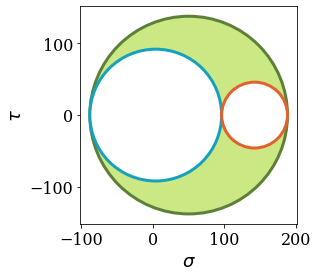

In [25]:
"""
Mohr circle in 3D.
@author: Nicolás Guarín-Zapata
@date: May 2020
"""
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigvalsh
from matplotlib import rcParams
 
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16 


def plot_mohr3d(S):
    r"""Plot 3D Mohr circles."""
    
    S3, S2, S1 = eigvalsh(S)

    R_maj = 0.5*(S1 - S3)
    cent_maj = 0.5*(S1+S3)
    
    R_min = 0.5*(S2 - S3)
    cent_min = 0.5*(S2 + S3)
    
    R_mid = 0.5*(S1 - S2)
    cent_mid = 0.5*(S1 + S2)
    
    circ1 = plt.Circle((cent_maj,0), R_maj, facecolor='#cce885', lw=3,
                       edgecolor='#5c8037')
    circ2 = plt.Circle((cent_min,0), R_min, facecolor='w', lw=3,
                       edgecolor='#15a1bd')
    circ3 = plt.Circle((cent_mid,0), R_mid, facecolor='w', lw=3,
                       edgecolor='#e4612d')
    plt.axis('image')
    ax = plt.gca()
    ax.add_artist(circ1)
    ax.add_artist(circ2)
    ax.add_artist(circ3)
    ax.set_xlim(S3 - .1*R_maj, S1 + .1*R_maj)
    ax.set_ylim(-1.1*R_maj, 1.1*R_maj)
    plt.xlabel(r"$\sigma$", size=18)
    plt.ylabel(r"$\tau$", size=18)
    #plt.savefig('Mohr_circle_3D.svg')
    plt.show()

if __name__ == '__main__':    
    sigma = np.array([
        [150,100,95],
        [0,96,0],
        [95,0,-50]])    

    plt.figure()
    plot_mohr3d(sigma)
